In [0]:
import tensorflow
import keras
print (keras.__version__)

2.2.4


Using TensorFlow backend.


# 1.1 Imports from Keras

In [0]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import MaxPooling2D
from keras.layers import UpSampling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.datasets import cifar10
from keras import Sequential
from keras import Model
# Useful imports
import matplotlib as mpl
#mpl.use("Agg") # Uncomment this if you have problems to use plt.imshow
# In that case, replace plt.imshow by plt.imsave(’filename.png’, var),
# so the image will be saved to a file instead of displayed.
import matplotlib.pyplot as plt  # For plotting/saving images
import numpy as np

# 1.2 Loading the MNIST dataset

Train set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)
Train categorical labels shape: (60000, 10)
Test categorical labels shape: (10000, 10)
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


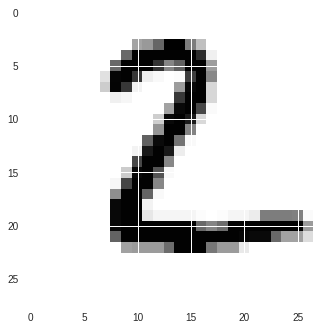

In [0]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Image normalization
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1
# Add one dimmention for the grayscale channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
# Labels to categorical (one hot)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
# Display dataset info
print ("Train set shape:", x_train.shape)
print ("Test set shape:", x_test.shape)
print ("Train categorical labels shape:", y_train_cat.shape)
print ("Test categorical labels shape:", y_test_cat.shape)
# Show one example
print (y_test[1], y_test_cat[1])
plt.imshow(x_test[1,:,:,0])

# 2. Image classification

# 2.1 Multilayer Perceptron

In [0]:
# Discriminator using DNN
D = Sequential(name="Discriminator")
# Layer 1
D.add(Flatten(input_shape=(28, 28, 1)))
D.add(Dense(1024))
D.add(BatchNormalization())
D.add(Activation("relu"))
# Layer 2
D.add(Dense(10))
D.add(Activation("softmax"))
D.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001, 0.5), metrics=["accuracy"])
D.summary()
D.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_49 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                10250     
_________________________________________________________________
activation_50 (Activation)   (None, 10)                0         
Total params: 818,186
Trainable params: 816,138
Non-trainable params: 2,048
_________________________________________________________________


# 2.2 Convolutional neural networks

In [0]:
# Discriminator using CNN
D = Sequential(name="Discriminator")
# Layer 1
D.add(Conv2D(32, (5, 5), strides=(2, 2), padding="same", input_shape=(28, 28, 1)))
D.add(Activation("relu"))
# Layer 2
D.add(Conv2D(64, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 3
D.add(Conv2D(128, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 4
D.add(Flatten())
D.add(Dense(128))
D.add(Activation("relu"))
# Layer 5
D.add(Dense(10))
D.add(Activation("softmax"))
D.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001, 0.5), metrics=["accuracy"])
D.summary()
D.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 14, 14, 32)        832       
_________________________________________________________________
activation_51 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
activation_52 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
activation_53 (Activation)   (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
__________

# 3 Artificial image generation

# 3.1 GAN with fully-connected layers

In [0]:
G = Sequential(name="Generator")
# Layer 1
G.add(Dense(256, input_shape=(100,)))
G.add(BatchNormalization())
G.add(Activation("relu"))
# Layer 2
G.add(Dense(512))
G.add(Activation("relu"))
# Layer 3
G.add(Dense(784))
G.add(Activation("softmax"))
G.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001, 0.5), metrics=["accuracy"])
G.summary()
# Add here some more layers...
G.add(Reshape((28, 28, 1))) # The output has the shape of an image

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               25856     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_56 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               131584    
_________________________________________________________________
activation_57 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 784)               402192    
_________________________________________________________________
activation_58 (Activation)   (None, 784)               0         
Total para

In [0]:
G = Sequential()
# Layer 1
G.add(Dense(256, input_shape=(100,)))
G.add(BatchNormalization())
G.add(Activation("relu"))
# Layer 2
G.add(Dense(512, input_shape=(256,)))
G.add(Activation("relu"))
# Layer 3
G.add(Dense(784, input_shape=(512,)))
G.add(Activation("tanh"))
G.add(Reshape((28, 28, 1))) # The output has the shape of an image

D = Sequential()
# Layer 1
D.add(Conv2D(32, (5, 5), strides=(2, 2), padding="same", input_shape=(28, 28, 1)))
D.add(Activation("relu"))
# Layer 2
D.add(Conv2D(64, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 3
D.add(Conv2D(128, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 4
D.add(Flatten())
D.add(Dense(128))
D.add(Activation("relu"))
# Layer 5
D.add(Dense(1))
D.add(Activation("sigmoid"))



D.compile(loss="binary_crossentropy", optimizer=Adam(0.0001, 0.5))
D.trainable = False
gan_input = Input(shape=(100,))
gan_output = D(G(gan_input))
gan = Model(gan_input, gan_output) # This is the combined model
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0001, 0.5))
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_13 (Sequential)   (None, 28, 28, 1)         560656    
_________________________________________________________________
sequential_14 (Sequential)   (None, 1)                 519425    
Total params: 1,080,081
Trainable params: 560,144
Non-trainable params: 519,937
_________________________________________________________________


In [0]:
batch_size = 64
x_train_c = x_train[np.where(y_train == 4)[0]] # Lets train only for numbers 4
num_batches = int(len(x_train_c) / batch_size)
for epoch in range(20):
  for batch in range(num_batches):
    # Select a random batch from x_train_c
    x = x_train_c[np.random.randint(0, len(x_train_c), size=batch_size)]
    # Gaussian noise for the generator model
    noise = np.random.normal(0, 1, size=[batch_size, 100])
    # Generate fake images
    gen_imgs = G.predict(noise)
    disc_data = np.concatenate([x, gen_imgs])
    # True images are labeled 1, false ones are 0
    labels = [0.9]*batch_size + [0]*batch_size
    D.trainable = True
    dloss = D.train_on_batch(disc_data, labels)
    D.trainable = False # Freeze the discriminator
    gloss = gan.train_on_batch(noise, [1]*batch_size)
    print ("\b"*79 + "\r", end="")
    print ("Epoch %d, batch %d/%d: " % (epoch+1, batch, num_batches) + \
    " gloss=%.4f, dloss=%.4f" % (gloss, dloss), end="")
  print ("")
# Save the weights after training
G.save_weights("./gen_weights.hdf5")
D.save_weights("./disc_weights.hdf5")

Epoch 1, batch 90/91:  gloss=1.3251, dloss=0.3970
Epoch 2, batch 90/91:  gloss=3.0834, dloss=0.3025
Epoch 3, batch 90/91:  gloss=2.4940, dloss=0.2800
Epoch 4, batch 90/91:  gloss=3.0066, dloss=0.2661
Epoch 5, batch 90/91:  gloss=3.1003, dloss=0.2359
Epoch 6, batch 90/91:  gloss=2.9559, dloss=0.3019
Epoch 7, batch 90/91:  gloss=2.8797, dloss=0.2588
Epoch 8, batch 90/91:  gloss=2.9171, dloss=0.2441
Epoch 9, batch 90/91:  gloss=3.2677, dloss=0.2204
Epoch 10, batch 90/91:  gloss=2.6700, dloss=0.2591
Epoch 11, batch 90/91:  gloss=3.8311, dloss=0.2408
Epoch 12, batch 90/91:  gloss=3.5361, dloss=0.2325
Epoch 13, batch 90/91:  gloss=3.3127, dloss=0.2259
Epoch 14, batch 90/91:  gloss=3.3236, dloss=0.2217
Epoch 15, batch 90/91:  gloss=2.5389, dloss=0.2729
Epoch 16, batch 90/91:  gloss=3.4253, dloss=0.2151
Epoch 17, batch 90/91:  gloss=4.7043, dloss=0.1820
Epoch 18, batch 90/91:  gloss=3.2407, dloss=0.2182
Epoch 19, batch 90/91:  gloss=3.1585, dloss=0.2219
Epoch 20, batch 90/91:  gloss=3.1956, dl

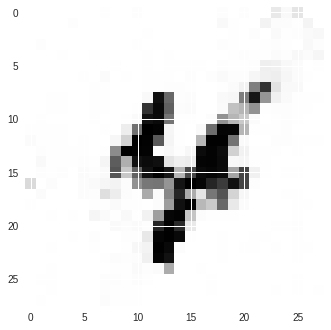

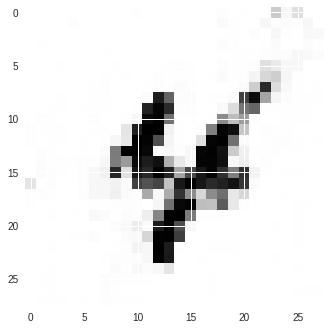

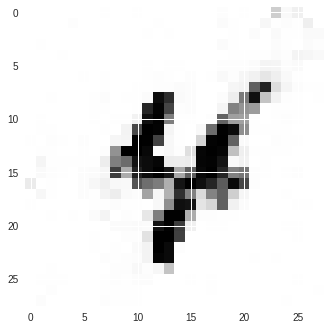

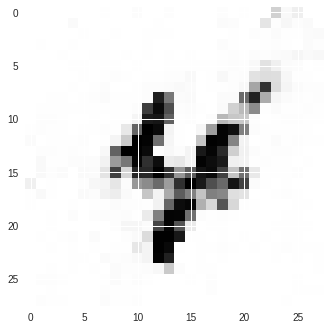

In [0]:
noise = np.random.normal(0, 1, size=[4, 100])
gen_imgs = G.predict(noise)
for i in range(len(noise)):
  plt.imshow((gen_imgs[i,:,:,0] + 1) / 2)
  plt.show()
  plt.imsave('img%02d.png' % i, gen_imgs[i,:,:,0])

# 3.2 Deep Convolutional GAN (DCGAN)

In [0]:
G = Sequential()
G.add(Dense(7*7*128, input_shape=(100,)))
G.add(Activation("relu"))
G.add(Reshape((7, 7, 128)))
G.add(Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding="same")) # The output shape is (14x14x64)
G.add(Conv2DTranspose(32, kernel_size=(5, 5), strides=(2, 2), padding="same")) # The output shape is (28x28x32)
G.add(Conv2DTranspose(1, kernel_size=(5, 5), strides=(1, 1), padding="same"))  # The output shape is (28x28x1)
G.add(Activation("tanh"))
G.summary()
G.add(Reshape((28, 28, 1))) # The output has the shape of an image

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 6272)              633472    
_________________________________________________________________
activation_105 (Activation)  (None, 6272)              0         
_________________________________________________________________
reshape_22 (Reshape)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_22 (Conv2DT (None, 14, 14, 64)        204864    
_________________________________________________________________
conv2d_transpose_23 (Conv2DT (None, 28, 28, 32)        51232     
_________________________________________________________________
conv2d_transpose_24 (Conv2DT (None, 28, 28, 1)         801       
_________________________________________________________________
activation_106 (Activation)  (None, 28, 28, 1)         0         
Total para

In [0]:
G = Sequential()
G.add(Dense(7*7*128, input_shape=(100,)))
G.add(Activation("relu"))
G.add(Reshape((7, 7, 128)))
G.add(Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding="same")) # The output shape is (14x14x64)
G.add(Conv2DTranspose(32, kernel_size=(5, 5), strides=(2, 2), padding="same")) # The output shape is (28x28x32)
G.add(Conv2DTranspose(1, kernel_size=(5, 5), strides=(1, 1), padding="same"))  # The output shape is (28x28x1)
G.add(Activation("tanh"))
G.add(Reshape((28, 28, 1))) # The output has the shape of an image



D = Sequential()
# Layer 1
D.add(Conv2D(32, (5, 5), strides=(2, 2), padding="same", input_shape=(28, 28, 1)))
D.add(Activation("relu"))
# Layer 2
D.add(Conv2D(64, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 3
D.add(Conv2D(128, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 4
D.add(Flatten())
D.add(Dense(128))
D.add(Activation("relu"))
# Layer 5
D.add(Dense(1))
D.add(Activation("sigmoid"))



D.compile(loss="binary_crossentropy", optimizer=Adam(0.0001, 0.5))
D.trainable = False
gan_input = Input(shape=(100,))
gan_output = D(G(gan_input))
gan = Model(gan_input, gan_output) # This is the combined model
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0001, 0.5))
gan.summary()


# The output shape is (14x14x64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_15 (Sequential)   (None, 28, 28, 1)         890369    
_________________________________________________________________
sequential_16 (Sequential)   (None, 1)                 519425    
Total params: 1,409,794
Trainable params: 890,369
Non-trainable params: 519,425
_________________________________________________________________


In [0]:
batch_size = 64
x_train_c = x_train[np.where(y_train == 4)[0]] # Lets train only for numbers 4
num_batches = int(len(x_train_c) / batch_size)
for epoch in range(20):
  for batch in range(num_batches):
    # Select a random batch from x_train_c
    x = x_train_c[np.random.randint(0, len(x_train_c), size=batch_size)]
    # Gaussian noise for the generator model
    noise = np.random.normal(0, 1, size=[batch_size, 100])
    # Generate fake images
    gen_imgs = G.predict(noise)
    disc_data = np.concatenate([x, gen_imgs])
    # True images are labeled 1, false ones are 0
    labels = [0.9]*batch_size + [0]*batch_size
    D.trainable = True
    dloss = D.train_on_batch(disc_data, labels)
    D.trainable = False # Freeze the discriminator
    gloss = gan.train_on_batch(noise, [1]*batch_size)
    print ("\b"*79 + "\r", end="")
    print ("Epoch %d, batch %d/%d: " % (epoch+1, batch, num_batches) + \
    " gloss=%.4f, dloss=%.4f" % (gloss, dloss), end="")
  print ("")
# Save the weights after training
G.save_weights("./gen_weights.hdf5")
D.save_weights("./disc_weights.hdf5")

Epoch 1, batch 90/91:  gloss=0.7440, dloss=0.5191
Epoch 2, batch 90/91:  gloss=1.3253, dloss=0.4366
Epoch 3, batch 90/91:  gloss=1.9858, dloss=0.4793
Epoch 4, batch 90/91:  gloss=1.5010, dloss=0.4581
Epoch 5, batch 90/91:  gloss=1.5792, dloss=0.4295
Epoch 6, batch 90/91:  gloss=1.8029, dloss=0.4504
Epoch 7, batch 90/91:  gloss=2.1710, dloss=0.4832
Epoch 8, batch 90/91:  gloss=1.1138, dloss=0.5670
Epoch 9, batch 90/91:  gloss=1.4562, dloss=0.4755
Epoch 10, batch 90/91:  gloss=1.3141, dloss=0.5335
Epoch 11, batch 90/91:  gloss=1.2952, dloss=0.4804
Epoch 12, batch 90/91:  gloss=1.1170, dloss=0.5253
Epoch 13, batch 90/91:  gloss=1.3259, dloss=0.5725
Epoch 14, batch 90/91:  gloss=1.1077, dloss=0.5150
Epoch 15, batch 90/91:  gloss=1.1596, dloss=0.5311
Epoch 16, batch 90/91:  gloss=1.7576, dloss=0.5925
Epoch 17, batch 90/91:  gloss=1.3650, dloss=0.5324
Epoch 18, batch 90/91:  gloss=1.2411, dloss=0.5498
Epoch 19, batch 90/91:  gloss=0.9576, dloss=0.5392
Epoch 20, batch 90/91:  gloss=1.0698, dl

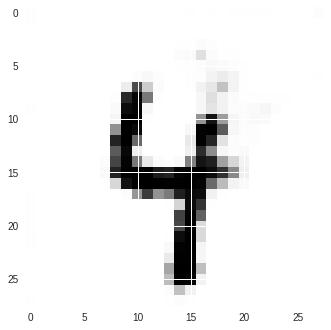

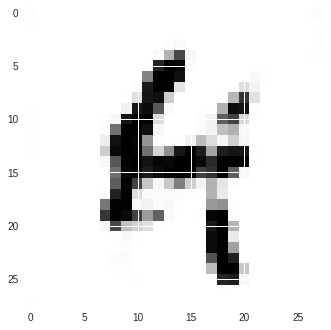

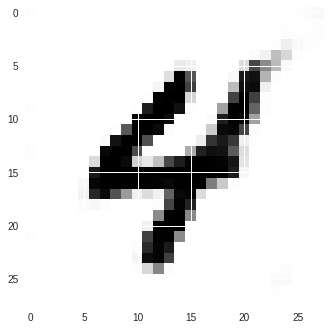

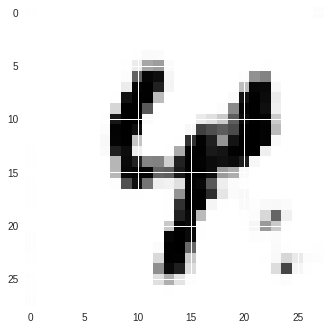

In [0]:
noise = np.random.normal(0, 1, size=[4, 100])
gen_imgs = G.predict(noise)
for i in range(len(noise)):
  plt.imshow((gen_imgs[i,:,:,0] + 1) / 2)
  plt.show()
  plt.imsave('img%02d.png' % i, gen_imgs[i,:,:,0])

In [0]:
batch_size = 64
x_train_c = x_train # We train with the full dataset
num_batches = int(len(x_train_c) / batch_size)
for epoch in range(20):
  for batch in range(num_batches):
    # Select a random batch from x_train_c
    x = x_train_c[np.random.randint(0, len(x_train_c), size=batch_size)]
    # Gaussian noise for the generator model
    noise = np.random.normal(0, 1, size=[batch_size, 100])
    # Generate fake images
    gen_imgs = G.predict(noise)
    disc_data = np.concatenate([x, gen_imgs])
    # True images are labeled 1, false ones are 0
    labels = [0.9]*batch_size + [0]*batch_size
    D.trainable = True
    dloss = D.train_on_batch(disc_data, labels)
    D.trainable = False # Freeze the discriminator
    gloss = gan.train_on_batch(noise, [1]*batch_size)
    print ("\b"*79 + "\r", end="")
    print ("Epoch %d, batch %d/%d: " % (epoch+1, batch, num_batches) + \
    " gloss=%.4f, dloss=%.4f" % (gloss, dloss), end="")
  print ("")
# Save the weights after training
G.save_weights("./gen_weights.hdf5")
D.save_weights("./disc_weights.hdf5")

Epoch 1, batch 936/937:  gloss=2.4523, dloss=0.4032
Epoch 2, batch 936/937:  gloss=1.8215, dloss=0.3559
Epoch 3, batch 936/937:  gloss=2.2926, dloss=0.3548
Epoch 4, batch 936/937:  gloss=2.8613, dloss=0.3931
Epoch 5, batch 936/937:  gloss=2.8215, dloss=0.3555
Epoch 6, batch 936/937:  gloss=2.4630, dloss=0.3248
Epoch 7, batch 936/937:  gloss=2.2213, dloss=0.3841
Epoch 8, batch 936/937:  gloss=2.6284, dloss=0.3118
Epoch 9, batch 936/937:  gloss=3.0585, dloss=0.3061
Epoch 10, batch 936/937:  gloss=2.8607, dloss=0.3518
Epoch 11, batch 936/937:  gloss=2.1704, dloss=0.3489
Epoch 12, batch 936/937:  gloss=3.7362, dloss=0.3433
Epoch 13, batch 936/937:  gloss=4.0969, dloss=0.2588
Epoch 14, batch 936/937:  gloss=3.2717, dloss=0.2839
Epoch 15, batch 936/937:  gloss=4.0627, dloss=0.2452
Epoch 16, batch 936/937:  gloss=3.1943, dloss=0.2881
Epoch 17, batch 936/937:  gloss=3.5004, dloss=0.2787
Epoch 18, batch 936/937:  gloss=3.9209, dloss=0.3303
Epoch 19, batch 936/937:  gloss=4.1509, dloss=0.2553
Ep

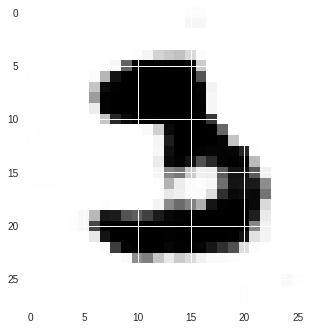

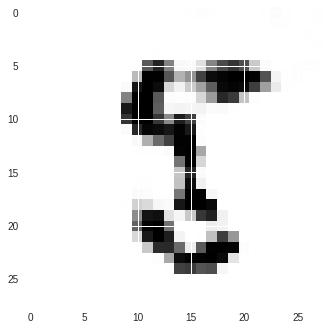

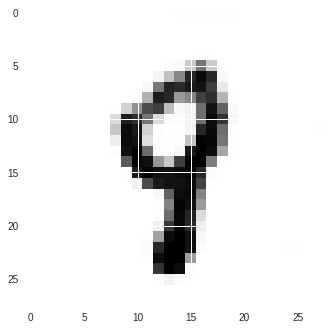

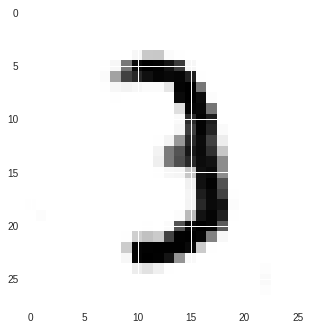

In [0]:
noise = np.random.normal(0, 1, size=[4, 100])
gen_imgs = G.predict(noise)
for i in range(len(noise)):
  plt.imshow((gen_imgs[i,:,:,0] + 1) / 2)
  plt.show()
  plt.imsave('img%02d.png' % i, gen_imgs[i,:,:,0])

# 3.3 CIFAR10

In [0]:
from keras.datasets import cifar10

Train set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Train categorical labels shape: (50000, 10)
Test categorical labels shape: (10000, 10)
[8] [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


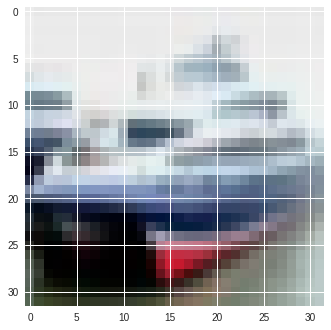

In [0]:
# Load the CIFAR10 dataset
(x_train2, y_train2), (x_test2, y_test2) = cifar10.load_data()
# Image normalization
x_train2 = x_train2 / 255
x_test2 = x_test2 / 255
# Labels to categorical (one hot)
y_train_cat2 = to_categorical(y_train2, num_classes=10)
y_test_cat2 = to_categorical(y_test2, num_classes=10)
# Display dataset info
print ("Train set shape:", x_train2.shape)
print ("Test set shape:", x_test2.shape)
print ("Train categorical labels shape:", y_train_cat2.shape)
print ("Test categorical labels shape:", y_test_cat2.shape)
# Show one example
print (y_test2[1], y_test_cat2[1])
plt.imshow(x_test2[1,:,:,:])

In [0]:
G = Sequential()
G.add(Dense(8*8*384, input_shape=(100,)))
G.add(Activation("relu"))
G.add(Reshape((8, 8, 384)))
G.add(Conv2DTranspose(192, kernel_size=(5, 5), strides=(2, 2), padding="same")) # The output shape is (16x16x64)
G.add(Conv2DTranspose(96, kernel_size=(5, 5), strides=(2, 2), padding="same")) # The output shape is (32x32x32)
G.add(Conv2DTranspose(3, kernel_size=(5, 5), strides=(1, 1), padding="same"))  # The output shape is (32x32x3)
G.add(Activation("tanh"))
G.add(Reshape((32, 32, 3))) # The output has the shape of an image



D = Sequential()
# Layer 1
D.add(Conv2D(96, (5, 5), strides=(2, 2), padding="same", input_shape=(32, 32, 3)))
D.add(Activation("relu"))
# Layer 2
D.add(Conv2D(192, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 3
D.add(Conv2D(384, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 4
D.add(Flatten())
D.add(Dense(384))
D.add(Activation("relu"))
# Layer 5
D.add(Dense(1))
D.add(Activation("sigmoid"))



D.compile(loss="binary_crossentropy", optimizer=Adam(0.0001, 0.5))
D.trainable = False
gan_input = Input(shape=(100,))
gan_output = D(G(gan_input))
gan = Model(gan_input, gan_output) # This is the combined model
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0001, 0.5))
gan.summary()


# The output shape is (14x14x64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 100)               0         
_________________________________________________________________
sequential_21 (Sequential)   (None, 32, 32, 3)         4793667   
_________________________________________________________________
sequential_22 (Sequential)   (None, 1)                 4671937   
Total params: 9,465,604
Trainable params: 4,793,667
Non-trainable params: 4,671,937
_________________________________________________________________


In [0]:
batch_size = 64
x_train_c = x_train2[np.where(y_train2 == 2)[0]] 
num_batches = int(len(x_train_c) / batch_size)
for epoch in range(20):
  for batch in range(num_batches):
    # Select a random batch from x_train_c
    x = x_train_c[np.random.randint(0, len(x_train_c), size=batch_size)]
    # Gaussian noise for the generator model
    noise = np.random.normal(0, 1, size=[batch_size, 100])
    # Generate fake images
    gen_imgs = G.predict(noise)
    disc_data = np.concatenate([x, gen_imgs])
    # True images are labeled 1, false ones are 0
    labels = [0.9]*batch_size + [0]*batch_size
    D.trainable = True
    dloss = D.train_on_batch(disc_data, labels)
    D.trainable = False # Freeze the discriminator
    gloss = gan.train_on_batch(noise, [1]*batch_size)
    print ("\b"*79 + "\r", end="")
    print ("Epoch %d, batch %d/%d: " % (epoch+1, batch, num_batches) + \
    " gloss=%.4f, dloss=%.4f" % (gloss, dloss), end="")
  print ("")
# Save the weights after training
G.save_weights("./gen_weights.hdf5")
D.save_weights("./disc_weights.hdf5")

Epoch 1, batch 77/78:  gloss=3.3031, dloss=0.4794
Epoch 2, batch 77/78:  gloss=2.1730, dloss=0.3865
Epoch 3, batch 77/78:  gloss=2.5789, dloss=0.3562
Epoch 4, batch 77/78:  gloss=2.6279, dloss=0.2935
Epoch 5, batch 77/78:  gloss=2.5537, dloss=0.3031
Epoch 6, batch 77/78:  gloss=1.9122, dloss=0.3985
Epoch 7, batch 77/78:  gloss=2.1101, dloss=0.3879
Epoch 8, batch 77/78:  gloss=2.5958, dloss=0.3024
Epoch 9, batch 77/78:  gloss=2.9859, dloss=0.3015
Epoch 10, batch 77/78:  gloss=2.7220, dloss=0.2782
Epoch 11, batch 77/78:  gloss=2.4821, dloss=0.3145
Epoch 12, batch 77/78:  gloss=3.6998, dloss=0.3028
Epoch 13, batch 77/78:  gloss=2.8461, dloss=0.3073
Epoch 14, batch 77/78:  gloss=3.2179, dloss=0.2895
Epoch 15, batch 77/78:  gloss=2.4809, dloss=0.2978
Epoch 16, batch 77/78:  gloss=2.6528, dloss=0.3180
Epoch 17, batch 77/78:  gloss=3.0901, dloss=0.2580
Epoch 18, batch 77/78:  gloss=2.3480, dloss=0.2902
Epoch 19, batch 77/78:  gloss=2.5982, dloss=0.2928
Epoch 20, batch 77/78:  gloss=3.1367, dl

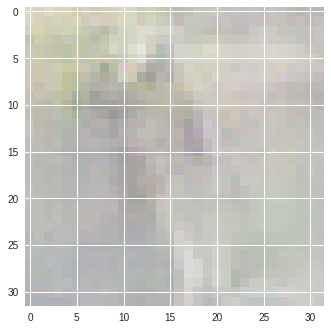

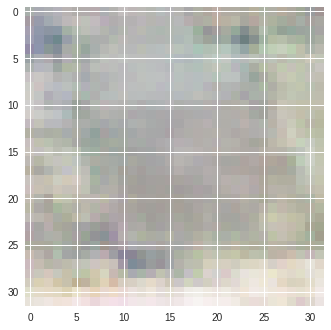

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


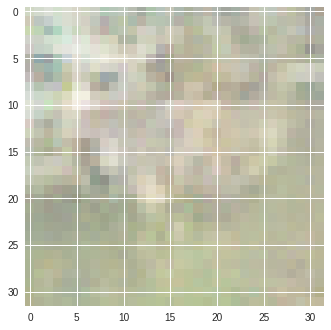

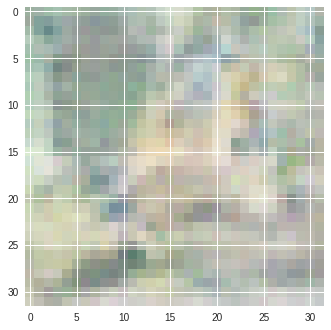

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [0]:
noise = np.random.normal(0, 1, size=[4, 100])
gen_imgs = G.predict(noise)
for i in range(len(noise)):
  plt.imshow((gen_imgs[i,:,:,:] + 1) / 2)
  plt.show()
  plt.imsave('img%02d.png' % i, gen_imgs[i,:,:,:])